# imports

In [1]:
from notebooks_tools import *
%matplotlib inline

# load MC tracks

In [2]:
MCBNB_gen = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_MC_BNB_AnalysisTrees.csv')
MCBNB_gen_protons = MCBNB_gen[(MCBNB_gen.pdg==2212) & (MCBNB_gen.primary==1)]
MCBNB_gen_nonprotons = MCBNB_gen[MCBNB_gen.pdg!=2212]
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]
MCBNB_rec_nonprotons = MCBNB_rec[MCBNB_rec.MCpdgCode!=2212]

In [36]:
print 'generated events:',len(MCBNB_gen.groupby(['run','subrun','event'])) 
print 'generated contained tracks:',len(MCBNB_gen)
print 'reconstructed contained tracks:',len(MCBNB_rec)
print 'generated contained protons:',len(MCBNB_gen_protons) 
print 'reconstructed contained protons:',len(MCBNB_rec_protons)

generated events: 559176
generated contained tracks: 6712648
reconstructed contained tracks: 333087
generated contained protons: 826268
reconstructed contained protons: 115305


In [3]:
print 'generated events:',len(MCBNB_gen.groupby(['run','subrun','event'])) 
print 'generated contained tracks:',len(MCBNB_gen)
print 'reconstructed contained tracks:',len(MCBNB_rec)
print 'generated contained protons:',len(MCBNB_gen_protons) 
print 'reconstructed contained protons:',len(MCBNB_rec_protons)

generated events: 345748
generated contained tracks: 2627720
reconstructed contained tracks: 387789
generated contained protons: 369804
reconstructed contained protons: 134019


In [4]:
def acceptace_2d( vx='theta' , vy='phi', 
                 x_label='$\\theta$ [rad.]',y_label='$\\phi$ [rad.]',
                 binsx=np.linspace(0,3.4,30) , binsy=np.linspace(-3.4,3.4,30),
                 figsize=(14,7),fontsize=20,
                legend_loc='lower left',
                norm=LogNorm(),
                do_print=False):
    x = [binsx[i] for i in range(len(binsx)-1)]
    y = [binsy[i] for i in range(len(binsy)-1)]

    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(131)
    h_gen,xedges,yedges = np.histogram2d(MCBNB_gen_protons[vx],MCBNB_gen_protons[vy],bins=[binsx,binsy])
    h_rec,xedges,yedges = np.histogram2d(MCBNB_rec_protons['truth_'+vx],MCBNB_rec_protons['truth_'+vy],bins=[binsx,binsy])
    plt.scatter(MCBNB_gen_protons[vx],MCBNB_gen_protons[vy],s=7,color='black',label='generated')
    plt.scatter(MCBNB_rec_protons['truth_'+vx],MCBNB_rec_protons['truth_'+vy],s=4,color='green',label='reconstructed')
    ax = fig.add_subplot(132)
    plt.hist2d(MCBNB_gen_protons[vx],MCBNB_gen_protons[vy],bins=[binsx,binsy],cmap='gray_r')
    ax.set_title('generated')
    plt.colorbar()
    ax = fig.add_subplot(133)
    plt.hist2d(MCBNB_rec_protons['truth_'+vx],MCBNB_rec_protons['truth_'+vy],bins=[binsx,binsy],cmap='Greens')
    ax.set_title('reconstructed')
    plt.colorbar()
    fig,ax = plt.subplots(figsize=figsize)
    acceptance = np.zeros([len(binsx)-1,len(binsy)-1])
    for i in range(len(binsx)-1):
        for j in range(len(binsy)-1):
            if h_gen[i][j]>0 and h_gen[i][j]>h_rec[i][j]:
                acceptance[i][j] = float(h_rec[i][j])/h_gen[i][j]            
            elif h_rec[i][j]>h_gen[i][j]:
                acceptance[i][j] = 1
            elif h_gen[i][j]==0: 
                acceptance[i][j] = 0

    X, Y = np.meshgrid(xedges, yedges)
    if do_print:
        print 'h_gen:\n',h_gen
        print 'h_rec:\n',h_rec
        print 'acceptance:\n',acceptance
#     quadmesh = ax.pcolormesh(X, Y, acceptance,cmap='hot_r')#,norm=norm)
#     quadmesh = ax.imshow(acceptance)
    extent = [np.min(binsx),np.max(binsx),np.min(binsy),np.max(binsy)]
    im = ax.imshow(acceptance.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(acceptance == 0, acceptance).T, cmap='hot_r', interpolation='none', origin='lower', extent=extent)
    cb = plt.colorbar()

#     cb = plt.colorbar(quadmesh) 
    for l in cb.ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    ax.set_xlim(np.min(binsx),np.max(binsx))
    ax.set_ylim(np.min(binsy),np.max(binsy))
    set_axes(ax,x_label,y_label)
    return X , Y , acceptance

In [12]:
def uB_acceptace_1d( var='P', x_label='momentum [GeV/c]',
                    bins=np.linspace(0,2,30) ,
                    figsize=(10,10),fontsize=20,
                    legend_loc='lower left',
                    y_lim=None):
    return acceptace_1d( MCBNB_gen_protons[var][MCBNB_gen_protons.length>1.5] , MCBNB_rec_protons['truth_'+var] ,
                        bins=bins , figsize=figsize,fontsize=fontsize,
                        legend_loc=legend_loc, y_lim=y_lim, x_label=x_label) 

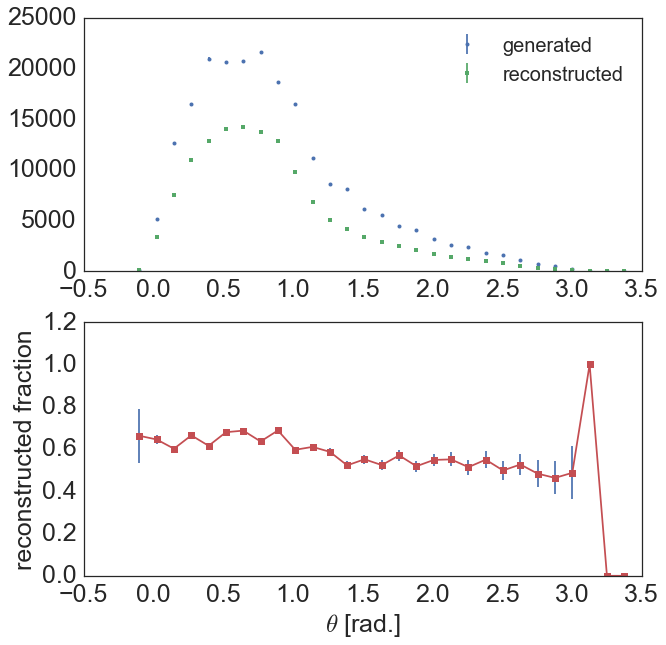

In [13]:
uB_acceptace_1d( var='theta', x_label='$\\theta$ [rad.]', bins=np.linspace(-0.1,3.5,30),legend_loc='upper right' );

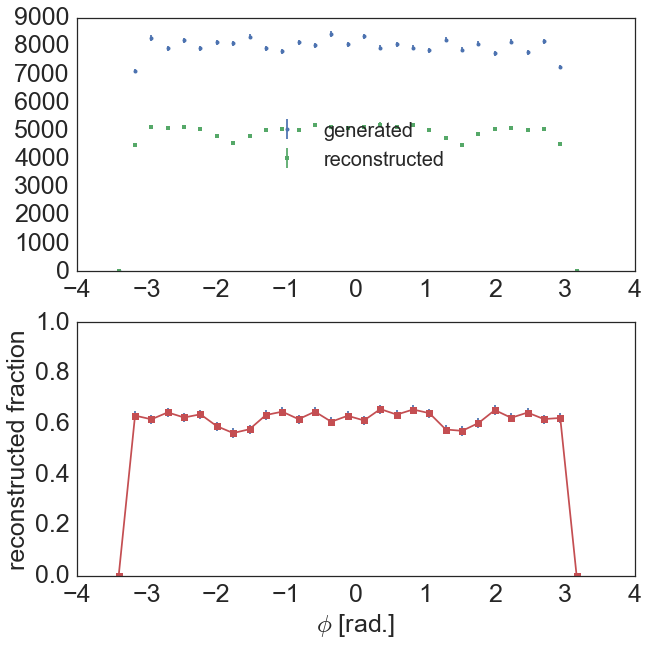

In [14]:
uB_acceptace_1d( var='phi', x_label='$\\phi$ [rad.]', bins=np.linspace(-3.4,3.4,30),legend_loc='center' );

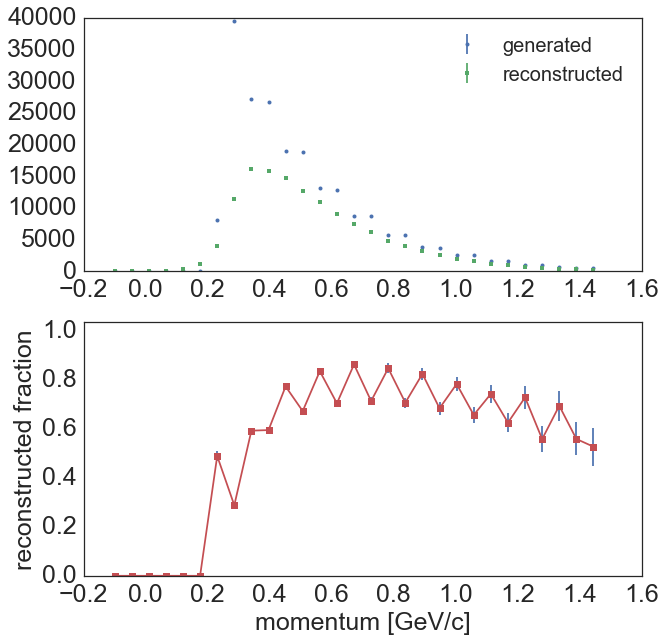

In [15]:
uB_acceptace_1d( var='P', x_label='momentum [GeV/c]', bins=np.linspace(-0.1,1.5,30),legend_loc='upper right' );

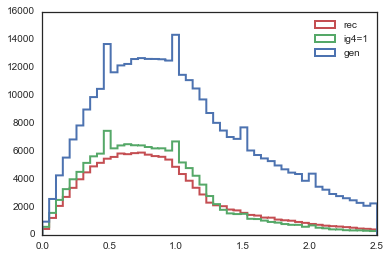

In [10]:
plt.hist([MCBNB_gen_protons.theta,
          MCBNB_gen_protons.theta[MCBNB_gen_protons.ig4==1],
          MCBNB_rec_protons.truth_theta],
         label=['gen','ig4=1','rec']
         ,bins=np.linspace(0,2.5,50),histtype='step',linewidth=2);
plt.legend()

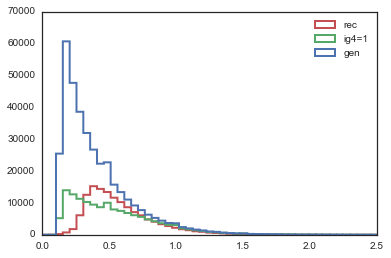

In [11]:
plt.hist([MCBNB_gen_protons.P,
          MCBNB_gen_protons.P[MCBNB_gen_protons.ig4==1],
          MCBNB_rec_protons.truth_P],
         label=['gen','ig4=1','rec']
         ,bins=np.linspace(0,2.5,50),histtype='step',linewidth=2);
plt.legend()

In [24]:
uB_acceptace_1d( var='KE', x_label='kinetic energy [GeV]', bins=np.linspace(0.01,0.81,30),legend_loc='upper right',y_lim=(0,0.4) )

KeyError: 'truth_KE'

h_gen:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
h_rec:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
acceptance:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

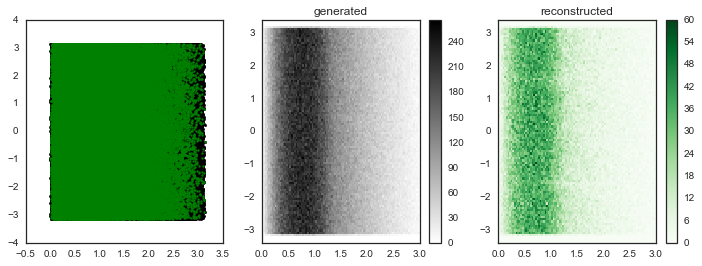

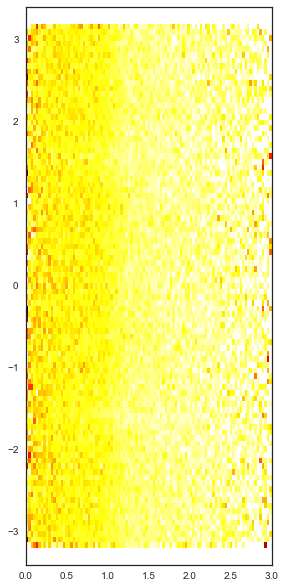

In [5]:
X , Y , acceptance = acceptace_2d( vx='theta' , vy='phi',binsx=np.linspace(0,3.,100) , binsy=np.linspace(-3.4,3.4,100), 
                                  do_print=True,
                                  norm=None,figsize=(20,10))

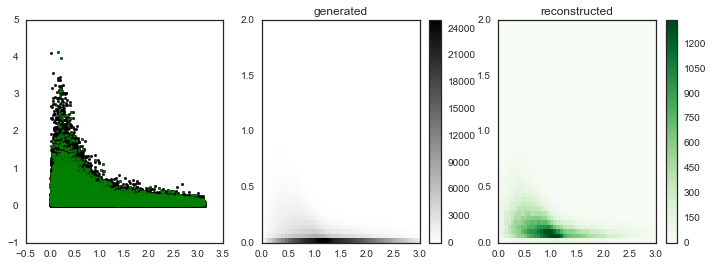

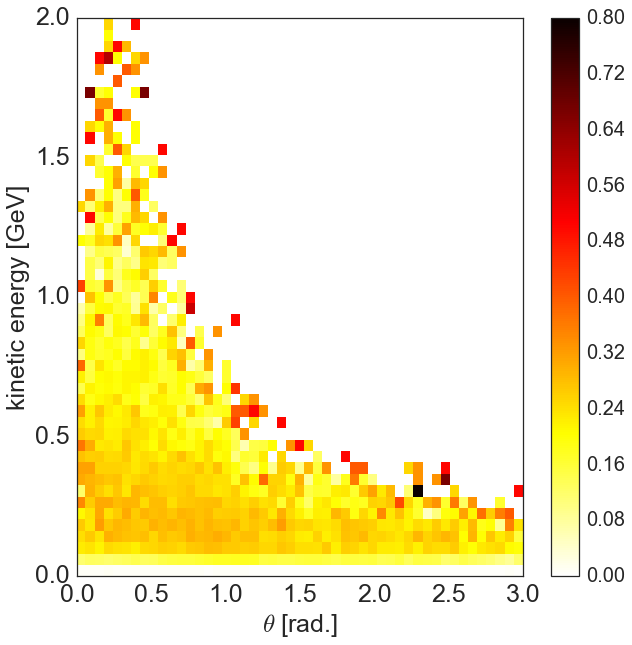

In [61]:
X , Y , acceptance = acceptace_2d( vx='theta' , vy='KE',binsx=np.linspace(0,3.,50) , binsy=np.linspace(0,2.,50) ,y_label='kinetic energy [GeV]' )

In [16]:
bins = np.linspace(0,50,50)
plt.hist(data_protons.pidpida[data_protons.pidpida<100],bins=bins,color='blue',histtype='step',label='MC protons')
plt.hist(data_nonprotons.pidpida[data_nonprotons.pidpida<100],bins=bins,color='green',histtype='step',label='MC non protons')
plt.legend()

NameError: name 'data_protons' is not defined

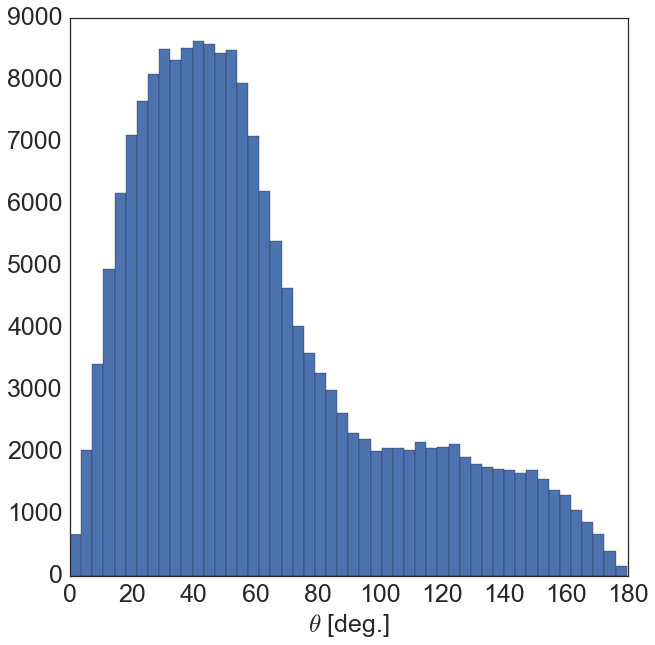

In [10]:
pt.plot_1d_hist(180/3.1415*data_protons.theta,bins=50,histtype='bar',xlabel='$\\theta$ [deg.]')

In [ ]:
pt.plot_2d_hist(180/3.1415*data_protons.theta,data_protons.Ev_truth,xlabel='$\\theta$ [deg.]',ylabel='truth $\\E_{\\nu}$ [MeV]')

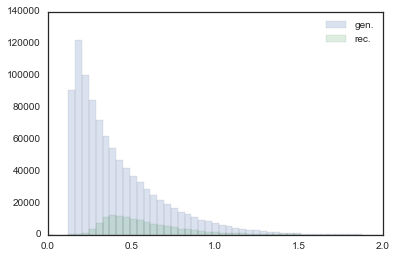

In [5]:
plt.hist(MCBNB_gen_protons.P,bins=np.linspace(0,2,50),alpha=0.2,label='gen.');
plt.hist(MCBNB_rec_protons.truth_P,bins=np.linspace(0,2,50),alpha=0.2,label='rec.');
plt.legend()